In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
YouTube_data = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')
YouTube_data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [7]:
YouTube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# Data Cleaning

In [9]:
def clean_data(YouTube_data):
    # Drop columns with a high number of missing values
    YouTube_data.drop(columns=['column_with_many_nans'], inplace=True, errors='ignore')
    
    # Fill missing values for categorical columns with 'Unknown'
    categorical_columns = ['category', 'Country', 'Abbreviation']
    for col in categorical_columns:
        YouTube_data[col].fillna('Unknown', inplace=True)
        
    # Drop rows with any remaining missing values
    YouTube_data.dropna(inplace=True)

    # Convert columns to appropriate data types
    YouTube_data['created_year'] = pd.to_datetime(YouTube_data['created_year'], errors='coerce')
    YouTube_data['subscribers'] = pd.to_numeric(YouTube_data['subscribers'], errors='coerce')
    YouTube_data['video views'] = pd.to_numeric(YouTube_data['video views'], errors='coerce')
    
    # Remove rows with any non-convertible data (NaN after conversion)
    YouTube_data.dropna(inplace=True)
    return YouTube_data

YouTube_data = clean_data(YouTube_data)

# Descriptive Statistics

In [11]:
def compute_statistics(YouTube_data):
    # Basic statistics
    description = YouTube_data.describe()
    print("Descriptive Statistics:\n", description)
    
    # Correlation matrix
    correlation = YouTube_data.corr()
    print("\nCorrelation Matrix:\n", correlation)
    return description, correlation

description, correlation = compute_statistics(YouTube_data)

Descriptive Statistics:
              rank   subscribers   video views        uploads  \
count  588.000000  5.880000e+02  5.880000e+02     588.000000   
mean   470.348639  2.428452e+07  1.281897e+10   13968.688776   
std    291.187124  1.905256e+07  1.692134e+10   43070.824813   
min      1.000000  1.230000e+07  2.634000e+03       1.000000   
25%    212.750000  1.470000e+07  4.920463e+09     434.500000   
50%    453.500000  1.860000e+07  8.770493e+09    1194.500000   
75%    722.250000  2.640000e+07  1.511898e+10    3886.500000   
max    995.000000  2.450000e+08  2.280000e+11  301308.000000   

       video_views_rank  country_rank  channel_type_rank  \
count      5.880000e+02    588.000000         588.000000   
mean       1.313749e+05    185.066327         248.161565   
std        6.820190e+05    729.415612         969.124359   
min        1.000000e+00      1.000000           1.000000   
25%        2.237500e+02     10.000000          19.000000   
50%        5.955000e+02     44.000000 

## Category Distribution (Bar Chart)


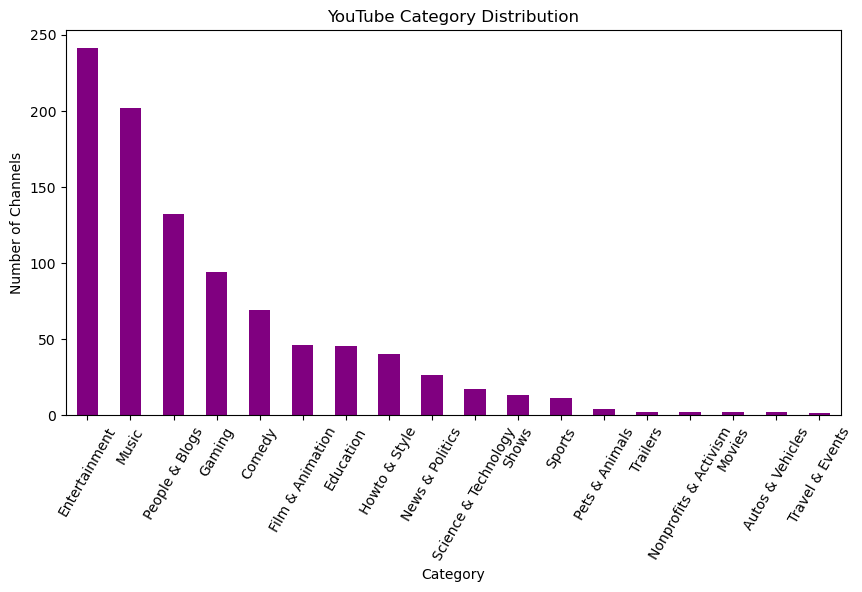

In [12]:
def plot_category_distribution(YouTube_data):
    plt.figure(figsize=(10, 5))
    YouTube_data['category'].value_counts().plot(kind='bar', color='purple')
    plt.title("YouTube Category Distribution")
    plt.xlabel("Category")
    plt.ylabel("Number of Channels")
    plt.xticks(rotation=60)
    plt.show()

plot_category_distribution(YouTube_data)

## Plot 2: Subscribers vs Video Views (Scatter Plot)

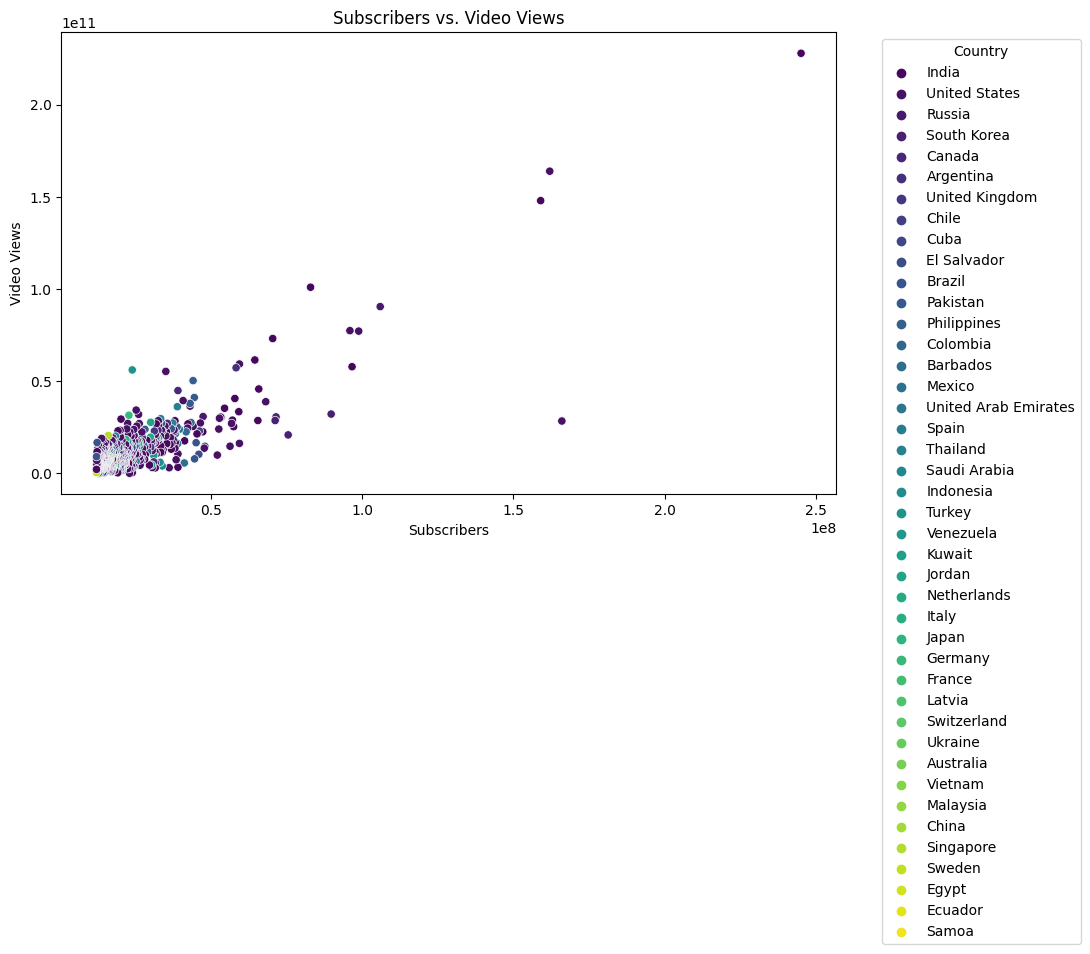

In [16]:
def plot_subscribers_vs_views(YouTube_data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=YouTube_data, x='subscribers', y='video views', hue='Country', palette='viridis')
    plt.title("Subscribers vs. Video Views")
    plt.xlabel("Subscribers")
    plt.ylabel("Video Views")
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_subscribers_vs_views(YouTube_data)

## Plot 3: Correlation Heatmap

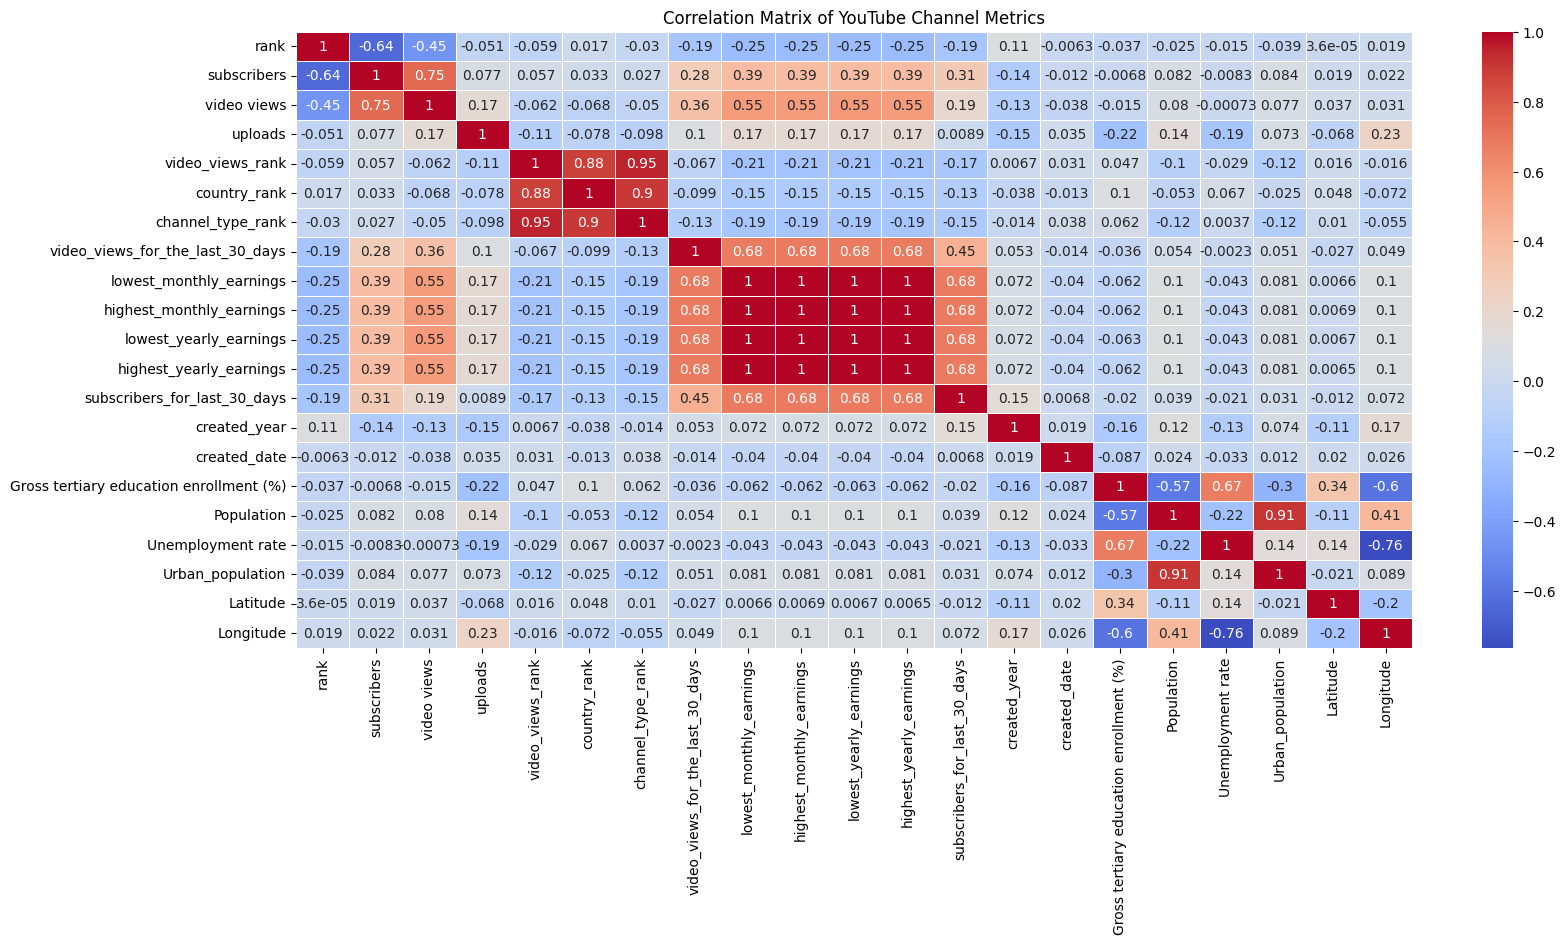

In [22]:
def plot_correlation_heatmap(YouTube_data):
    plt.figure(figsize=(18, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix of YouTube Channel Metrics")
    plt.show()

plot_correlation_heatmap(YouTube_data)

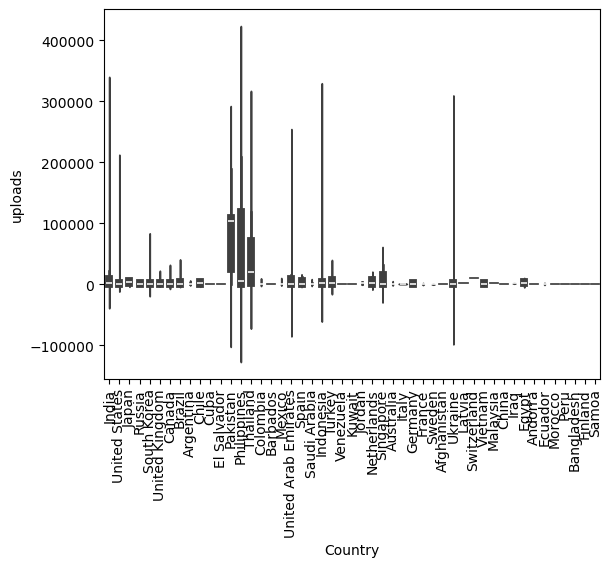

In [9]:
# violin plot
sns.violinplot(data=YouTube_data, x="Country", y="uploads")
plt.xticks(rotation=90)
plt.show()